# 🗎 Оценка качества

In [1]:
from IPython.display import display, Markdown
display(Markdown(open('_prew.md', 'r', encoding='utf-8').read()))

<div class="admonition note">
<p class="admonition-title">О среде выполнения </p>
<p> 
    Данная расчётно-графическая работа выполняется в <a href=i_sreda.html>программной среде Jupyter Notebook</a>.
Если у Вас на компьютере нет установленной вычислительной среды, см. 
  <a href=i_sredaonline.html>Выполнение расчетно-графических работ онлайн</a>.
</p>
</div>

**Задание**: представить отчет о качестве выполнения нескольких заданий, выполненных по инструкции. Качество оценивается в 1.0 (100%), если выполнение полностью соответствовало инструкции, и меньше 1.0, если есть несоответствия.

Предлагается использовать данные из теста "[Ускорение нажатий](w_data2)", в инструкции к которому можно выделить несколько критериев.

Альтернативно это могут быть описания товаров, услуг, выступлений и т.п. но при этом должны выполняться условия:

-   Должны быть даны оценки качества от 0 до 1 по как минимум трём критериям;
-   Итоговое качество как произведение всех частных оценок соответствия критериям;
-   Условное качество как взвешенная сумма частных оценок соответствия критериям;
-   Расчет среднего качества по группе объектов;
-   Вывод о качестве группы в целом.

При использовании собственных данных необходимо подробно описать требования к качеству.
При проблемах с определением критериев качества - проконсультируйтесь с преподавателем.

Те, кто использует данные из теста "Ускорение нажатий", могут использовать шаблон отчета <a href=d/qual_Familia.ipynb>qual_Familia.ipynb</a>.

Для заданий на ускорение нажатий можно использовать критерии:

 -  начальная частота нажатий - примерно 1 раз в с;
 -  конечная частота нажатий - вдвое быстрее;
 -  полных паттернов не менее 6;
 -  ошибки паттернов не превышают 10%.
 

Далее даны пошаговые инструкции для выполнения работы по этому шаблону.

## Начало работы

Переименуйте блокнот шаблона qual_Familia.ipynb, заменив "Familia" в названии на свою фамилию, чтобы не путаться при отправке и проверке. 

[](rename)

Выполните импорт библиотек.

In [2]:
%pylab inline
from ipywidgets import interact
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

Укажите источник данных. 
Данные теста "Ускорение нажатий" представляют собой маркеры - целочисленные коды событий в течение теста. Все события снабжены отметками времени.

Если у Вас есть доступ к Сети, то удобнее скачать данные с сайта http://uskor.stireac.com

Чтобы найти ссылку на свои данные - прилогиньтесь (вводится только адрес почты, потому что данные открыты, и логин нужен только для перехода к своим данным). Кликните на свой адрес и в выпадающем меню выберите пункт `Результаты`. Откроется список тестирований в виде таблицы, у которой в правой колонке есть кнопки для просмотра информации по каждому тестированию. 

На странице отчета помимо разнообразной информации есть две кнопки в конце для скачивания результатов. Первая из них ![](i/tsv_save_button.png) позволяет скачать таблицу маркеров в формате `*.tsv`. Если вызывать контекстное меню на этой картинке и скопировать ссылку, то эту же таблицу мы можем загрузить по этой ссылке автоматически.
Подставьте скопированную ссылку в код. 

Если Сеть недоступна, то можно открыть таблицу из скачанного файла, помещенного в текущую папку. Для этого надо изменить переменную `u` с Интернет-ссылки на имя файла (см. пример в закомментированной второй строке). Пример файла прилагается.

В конце ячейки мы выводим информацию о созданной таблице.
Проверьте, что данные загрузились в таблицу с двумя колонками.

Сделайте краткий комментарий об успешности загрузки данных.



In [3]:
u = 'm__178.155.4.92__3219165950000190320.tsv'
M = pd.read_table(u)

## Подготовка сводной таблицы

Основа данной работы - сбор сведений по каждому этапу с последующей интеграцией в виде оценок качества.

Вспомогательную информацию о тесте мы оформляем в виде мини-словарей `scancode_hand`, `hand_color`. 
Это соответствия сканкодов и обозначений рук (L - левая, R - правая) и соответствия рук и цветов на рисунках (потенциальных).


Посмотрите код создания сводной таблицы `S` с помощью библиотеки Pandas. Одну колонку с уникальными значениями мы создаем при вызове метода `DataFrame()`. Другие колонки мы создаем позже, присваивая одинаковое значение во всех строках, или в зависимости от позиции.
Всего у нас шесть строк по количеству этапов. 
Для удобства автоматический индекс, начинающийся с 0, мы переименовываем и увеличиваем на 1.

In [4]:
scancode_hand = {70:'L', 74:'R'}
hand_color = {'L':'red', 'R':'blue'}

S = pd.DataFrame([
    '0',
    '1',
    '01',
    '10',
    '0001',
    '1000',
         ], columns=['Паттерн'])
S.index+=1
S.index.name = 'Этап'
S['Условие'] = list(map(lambda n: ((n<=2) and 'одна рука') or ((n<=4) and 'поочередно') or 'паттерн', S.index ))

# нулевые значения для последующих подсчётов
S['L']=0
S['R']=0
S['Скорость в начале, Гц'] = 1.0
S['Скорость в конце, Гц'] = 5.0
S['Ошибки'] = 0

S

,Паттерн,Условие,L,R,"Скорость в начале, Гц","Скорость в конце, Гц",Ошибки
Этап,,,,,,,
1,0,одна рука,0,0,1.0,5.0,0
2,1,одна рука,0,0,1.0,5.0,0
3,01,поочередно,0,0,1.0,5.0,0
4,10,поочередно,0,0,1.0,5.0,0
5,0001,паттерн,0,0,1.0,5.0,0
6,1000,паттерн,0,0,1.0,5.0,0


## Сбор сведений

В последующих блоках мы заносим добытые сведения в таблицу. 
Смотрите примеры внесения данных.

Образцы расчетов см. в блокнотах с образцами кода <a href=d/qual_Familia.ipynb>Task_qual_uskor.ipynb</a> и 
<a href=d/Task_seq_uskor.ipynb>Task_seq_uskor.ipynb</a>.

### Качество этапа 1

Отберем данные для первого этапа. Логика отбора моментов нажатий в пределах одного этапа состоит в вычислении моментов времени начала и конца этапа. Затем делаем копию массива данных между этими отметками времени и очищаем от ненужных маркеров (нам нужно только нажатия, отжатия и служебные коды не нужны).

Коды для первого этапа 1001 и до 1002 (начала второго этапа).

In [5]:
coab, coad = 1001, 1002
tab = M.t[M.v==coab].iloc[0]
tad = M.t[(M.t>tab) & (M.v==coad)].iloc[0]
R = M[(M.t>=tab)&(M.t<tad)].copy()
R = R[R.v.abs()<100]
R = R[R.v > 0]
R.v.value_counts()

74    94
13     1
Name: v, dtype: int64

На первом этапе были нажатия правой рукой. В разных случаях на первом этапе может быть или правая или левая рука. Но коду клавиши можно проверить какой рукой были сделаны нажатия с этим кодом.

In [6]:
(ord('F'), ord('J'))

(70, 74)

Оценим скоростные характеристики в начале и конце теста. Поскольку сколько длительность "начала" и "конца" не определена, то проще оценить скорость "на глаз", глядя на рисунок.

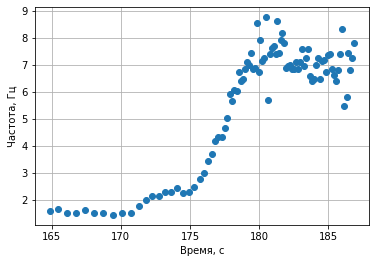

In [7]:
tt = R[R.v.isin([70,74])].t
iri = tt.diff()
plot(tt, 1/iri, 'o');
grid(True)
xlabel('Время, с')
ylabel('Частота, Гц');

Когда вся информация перед глазами, внесем сведения для первого этапа. Для удобства заведем переменную для обозначения строки. Такой код легко будет приспособить для повторного использования на следующих этапах.

In [8]:
ietap = 1
S.loc[ietap, 'Скорость в начале, Гц'] = 1
S.loc[ietap, 'Скорость в конце, Гц'] = 7
S.loc[ietap, 'R'] = 94

S.loc[ietap]

Паттерн                          0
Условие                  одна рука
L                                0
R                               94
Скорость в начале, Гц          1.0
Скорость в конце, Гц           7.0
Ошибки                           0
Name: 1, dtype: object

Ошибок паттернов на первых двух этапах быть не может, поскольку нажатия производятся только одной рукой.

## Качество этапа 2

Зададим номер этапа с самого начала, чтобы использовать эту переменную повторно.

In [9]:
ietap = 2

coab, coad = 1000+ietap, 1000+ietap+1
tab = M.t[M.v==coab].iloc[0]
tad = M.t[(M.t>tab) & (M.v==coad)].iloc[0]
R = M[(M.t>=tab)&(M.t<tad)].copy()
R = R[R.v.abs()<100]
R = R[R.v > 20]
N = R.v.value_counts()
N

70    63
Name: v, dtype: int64

Динамику частоты нажатий оцениваем так же, как для первого этапа.

Еще одно улучшение - сохранение счета нажатий для двух рук в переменной `N`. После этого количество нажатий в таблицу заносим без ручного ввода числа.

In [11]:
S.loc[ietap, 'Скорость в начале, Гц'] = 1
S.loc[ietap, 'Скорость в конце, Гц'] = 7
S.loc[ietap, 'L'] = N.iloc[0]
S.loc[ietap]

Паттерн                          1
Условие                  одна рука
L                               63
R                                0
Скорость в начале, Гц          1.0
Скорость в конце, Гц           7.0
Ошибки                           0
Name: 2, dtype: object

## Качество этапа 3


In [12]:
ietap = 3

coab, coad = 1000+ietap, 1000+ietap+1
tab = M.t[M.v==coab].iloc[0]
tad = M.t[(M.t>tab) & (M.v==coad)].iloc[0]
R = M[(M.t>=tab)&(M.t<tad)].copy()
R = R[R.v.abs()<100]
R = R[R.v > 20]
N = R.v.value_counts()
N

70    31
74    31
Name: v, dtype: int64

(0.0, 15.0)

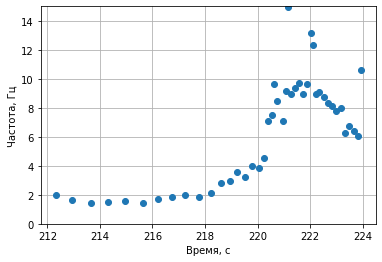

In [13]:
tt = R[R.v.isin([70,74])].t
iri = tt.diff()
plot(tt, 1/iri, 'o');
grid(True)
xlabel('Время, с')
ylabel('Частота, Гц');
ylim(0, 15)

На третьем этапе появляется возможность ошибок. Ошибка как правило возникают при переходе на быстрый темп нажатий.

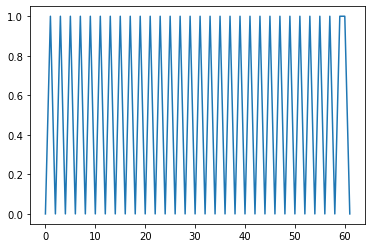

In [14]:
rr = R.v.values
rr = (rr - rr.min())/(rr.max()-rr.min())
plot(rr);

В конце видно одно нарушение зубчатого рисунка. Можно внести к таблицу количество ошибок - 1.

Количество "левых" и "правых" нажатий вносим одной командой.

In [15]:
S.loc[ietap, 'Скорость в начале, Гц'] = 1.9
S.loc[ietap, 'Скорость в конце, Гц'] = 9
S.loc[ietap, ['L','R']] = N.loc[70], N.loc[74]
S.loc[ietap, 'Ошибки'] = 1
S.loc[ietap]

Паттерн                          01
Условие                  поочередно
L                                31
R                                31
Скорость в начале, Гц           1.9
Скорость в конце, Гц            9.0
Ошибки                            1
Name: 3, dtype: object

## Качество этапа 4

In [16]:
ietap = 4

coab, coad = 1000+ietap, 1000+ietap+1
tab = M.t[M.v==coab].iloc[0]
tad = M.t[(M.t>tab) & (M.v==coad)].iloc[0]
R = M[(M.t>=tab)&(M.t<tad)].copy()
R = R[R.v.abs()<100]
R = R[R.v > 20]
N = R.v.value_counts()
N

74    39
70    38
Name: v, dtype: int64

(0.0, 15.0)

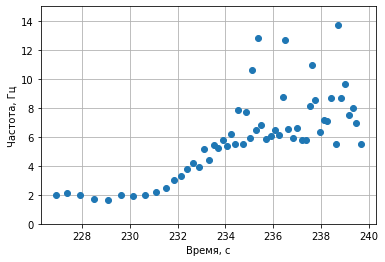

In [17]:
tt = R[R.v.isin([70,74])].t
iri = tt.diff()
plot(tt, 1/iri, 'o');
grid(True)
xlabel('Время, с')
ylabel('Частота, Гц');
ylim(0, 15)

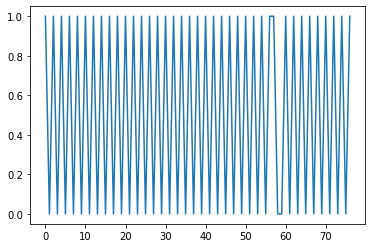

In [18]:
rr = R.v.values
rr = (rr - rr.min())/(rr.max()-rr.min())
plot(rr);

In [19]:
S.loc[ietap, 'Скорость в начале, Гц'] = 2
S.loc[ietap, 'Скорость в конце, Гц'] = 8
S.loc[ietap, ['L','R']] = N.loc[70], N.loc[74]
S.loc[ietap, 'Ошибки'] = 2
S.loc[ietap]

Паттерн                          10
Условие                  поочередно
L                                38
R                                39
Скорость в начале, Гц           2.0
Скорость в конце, Гц            8.0
Ошибки                            2
Name: 4, dtype: object

## Качество этапа 5

In [20]:
ietap = 5

coab, coad = 1000+ietap, 1000+ietap+1
tab = M.t[M.v==coab].iloc[0]
tad = M.t[(M.t>tab) & (M.v==coad)].iloc[0]
R = M[(M.t>=tab)&(M.t<tad)].copy()
R = R[R.v.abs()<100]
R = R[R.v > 20]
N = R.v.value_counts()
N

70    50
74    17
Name: v, dtype: int64

(0.0, 10.0)

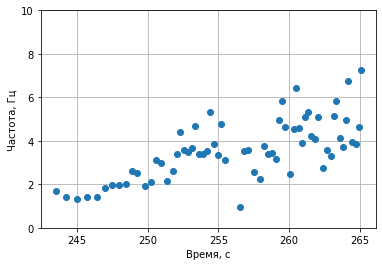

In [21]:
tt = R[R.v.isin([70,74])].t
iri = tt.diff()
plot(tt, 1/iri, 'o');
grid(True)
xlabel('Время, с')
ylabel('Частота, Гц');
ylim(0, 10)

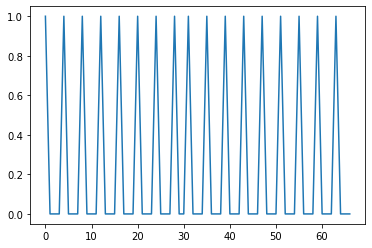

In [22]:
rr = R.v.values
rr = (rr - rr.min())/(rr.max()-rr.min())
plot(rr);

На пятом и шестом этапах "гребенка" для проверки ошибок отличается, но сбой в паттерне нажатий видно также четко.

In [23]:
S.loc[ietap, 'Скорость в начале, Гц'] = 1.4
S.loc[ietap, 'Скорость в конце, Гц'] = 5
S.loc[ietap, ['L','R']] = N.loc[70], N.loc[74]
S.loc[ietap, 'Ошибки'] = 1
S.loc[ietap]

Паттерн                     0001
Условие                  паттерн
L                             50
R                             17
Скорость в начале, Гц        1.4
Скорость в конце, Гц         5.0
Ошибки                         1
Name: 5, dtype: object

## Качество этапа 6

Для 6-го этапа, после которого нет других этапов, время окончания находим по времени первого нажатия клавиши "Enter" после начала. Этот шаблон можно применять на всех этапах - все этапы начинаются с кода `1000+ietap` и заканчиваются кодом 13 ("Enter").

In [24]:
ietap = 6

coab = 1000+ietap
coad = 13
tab = M.t[M.v==coab].iloc[0]
tad = M.t[(M.t>tab) & (M.v==coad)].iloc[0]
R = M[(M.t>=tab)&(M.t<tad)].copy()
R = R[R.v.abs()<100]
R = R[R.v > 20]
N = R.v.value_counts()
N

74    59
70    20
Name: v, dtype: int64

(0.0, 10.0)

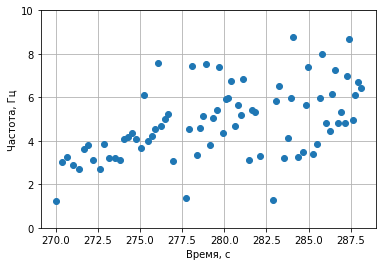

In [25]:
tt = R[R.v.isin([70,74])].t
iri = tt.diff()
plot(tt, 1/iri, 'o');
grid(True)
xlabel('Время, с')
ylabel('Частота, Гц');
ylim(0, 10)

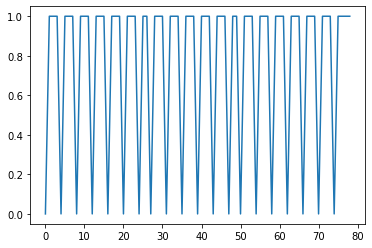

In [26]:
rr = R.v.values
rr = (rr - rr.min())/(rr.max()-rr.min())
plot(rr);

In [27]:
S.loc[ietap, 'Скорость в начале, Гц'] = 3
S.loc[ietap, 'Скорость в конце, Гц'] = 6
S.loc[ietap, ['L','R']] = N.loc[70], N.loc[74]
S.loc[ietap, 'Ошибки'] = 2
S.loc[ietap]

Паттерн                     1000
Условие                  паттерн
L                             20
R                             59
Скорость в начале, Гц        3.0
Скорость в конце, Гц         6.0
Ошибки                         2
Name: 6, dtype: object

Альтернативные источники сведений для заполнения таблицы - отчеты на сайте тестирования.
Если Вы берете сведения оттуда, а не из своих рисунков, надо это указать.

Количество паттернов посчитаем по формуле...

In [28]:
S['Паттернов'] = (S['L']+S['R']) / S['Паттерн'].str.len()
S

,Паттерн,Условие,L,R,"Скорость в начале, Гц","Скорость в конце, Гц",Ошибки,Паттернов
Этап,,,,,,,,
1,0,одна рука,0,94,1.0,7.0,0,94.00
2,1,одна рука,63,0,1.0,7.0,0,63.00
3,01,поочередно,31,31,1.9,9.0,1,31.00
4,10,поочередно,38,39,2.0,8.0,2,38.50
5,0001,паттерн,50,17,1.4,5.0,1,16.75
6,1000,паттерн,20,59,3.0,6.0,2,19.75


Итак, мы заполнили таблицу. Перед тем, как двигаться дальше, проверим, что внесенные значения соответствуют методике. На первых двух этапах нажатия были только одной рукой, и отсутствовали ошибки. Количество нажатий в колонках "L" и "R" в 3 и 4 этапах примерно равны, а на 5 и 6 этапах в соотношении 1 к 3.

## Расчет качества

> Создайте новые колонки для каждого критерия качества.

Создаем три критерия Q1, Q2, ...  со значениями от 0 до 1.

- Q1 Медленное начало, примерно раз в секунду.
- Q2 Быстрое окончание.
- Q3 Количество патернов не меньше 5.

In [30]:
S['Q1'] = ((S['Скорость в начале, Гц'] > 0.5) & (S['Скорость в начале, Гц'] < 1.5)) + 0.0
S['Q2'] = (S['Скорость в конце, Гц'] > 2.) + 0.0
S['Q3'] = (S['Паттернов'] > 5) + 0.0

> Затем создайте колонки с интегральными оценками. Их можно считать, производя операции целыми колонками.

In [31]:
S['Q'] = S['Q1'] * S['Q2'] * S['Q3']
S.Q

Этап
1    1.0
2    1.0
3    0.0
4    0.0
5    1.0
6    0.0
Name: Q, dtype: float64

При произведении частных критериев комплексная оценка обнуляется любым нулевым критерием.

In [32]:
#Сумма всех коэффициентов не должна быть больше 1
k1 = 0.5
k2 = 0.2
k3 = 1 - (k1 + k2)

S['K'] = k1*S ['Q1'] + k2*S['Q2'] + k3*S['Q3'] 

> Обоснуйте выбор весовых коэффициентов. Почему одни критерии весомее других?

In [33]:
S[['Q','K']]

,Q,K
Этап,,
1,1.0,1.0
2,1.0,1.0
3,0.0,0.5
4,0.0,0.5
5,1.0,1.0
6,0.0,0.5


> Которая из комплексных оценок лучше согласуется с Вашей личной "экспертной" оценкой?

Среднее качество по всем этапам.

In [34]:
S[['Q','K']].mean()

Q    0.50
K    0.75
dtype: float64

## Вывод


In [35]:
from IPython.display import display, Markdown
display(Markdown(open('_postw.md', 'r', encoding='utf-8').read()))

В конце отчета по расчётно-графической работе обязательно сделайте вывод.

1. Основной результат. Прежде всего в выводе должен прозвучать ответ на поставленный вопрос.
Что было целью работы, то и должно быть указано в выводе с конкретным числовым результатом.

2. Ограничения данной работы. Если в ходе работе были выявлены новые обстоятельства, которые привели к изменению хода работы, к ошибкам, к необходимости переосмысления возможности ее выполнения, то эти соображения надо изложить во вторую очередь. 

3. Педагогические и эмоциональные замечания. Поскольку эта работа учебная, то можно поделиться впечатлениями от самого процесса решения задачи. Что было сложным, что особенно понравилось, что оказалось удивительным и неожиданным.